In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
df.describe(d)

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


# Begin Exploratory data analysis

- check for missing value

In [7]:
df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot: >

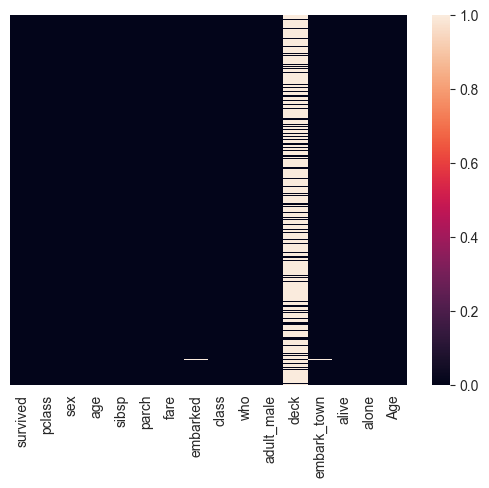

In [41]:
sns.heatmap(df.isnull(),yticklabels=False) # in this all null value will be shown by yellow color

by the above graph we can conclude that deck and age has more null values

<AxesSubplot: xlabel='survived', ylabel='count'>

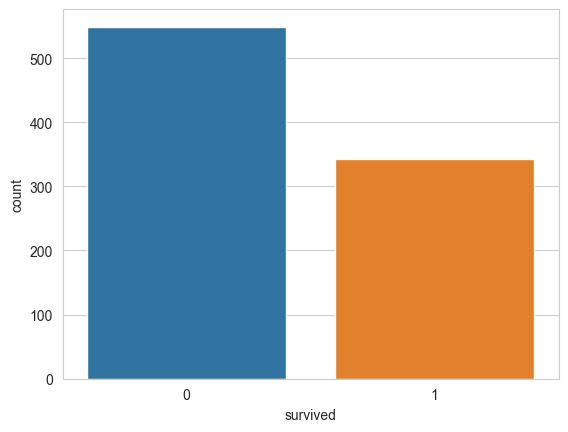

In [10]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df)

<AxesSubplot: xlabel='survived', ylabel='count'>

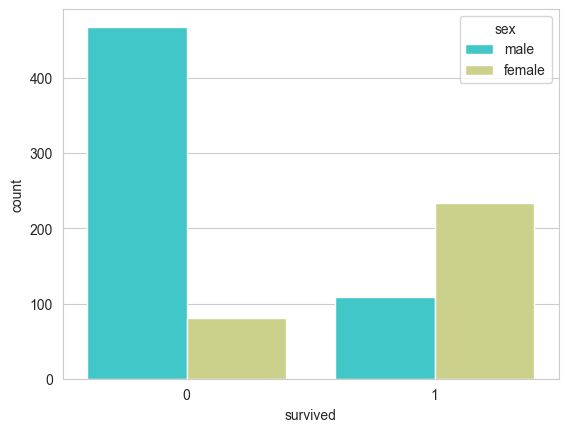

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df,hue='sex',palette='rainbow ')

the above graph shows that less people survived

<AxesSubplot: xlabel='survived', ylabel='count'>

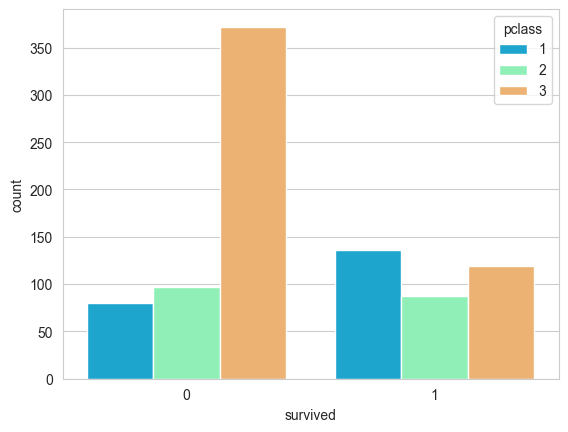

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='survived',data=df,hue='pclass',palette='rainbow')

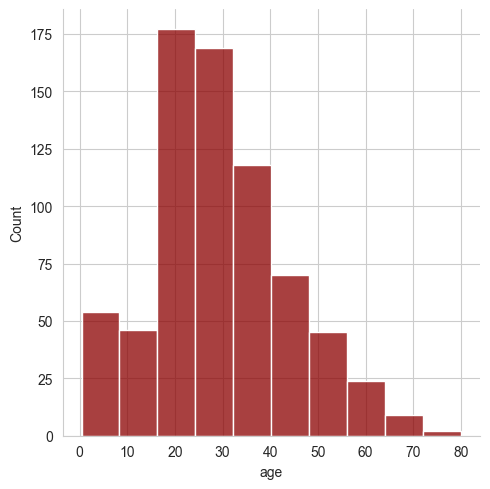

In [18]:
sns.displot(df['age'].dropna(),kde=False,color = 'darkred',bins=10)

<AxesSubplot: xlabel='pclass', ylabel='age'>

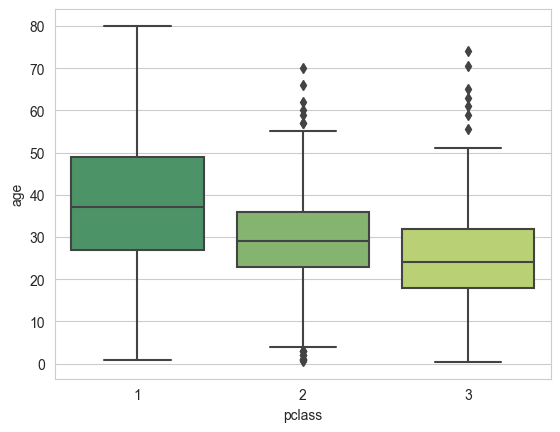

In [26]:
sns.boxplot(x='pclass',y='age',data=df,palette='summer')

now the above graph shows that: the 1 class peoples average value is 37 and 2 class people avrrage value is 29 and 3 class people value is 24
so now we can replace null value in age column

In [31]:
def rep(cols):
    age= cols[0]
    pclass = cols[1]

    if pd.isnull(age):
         if pclass == 1:
              return 37
         elif pclass == 2:
              return 29
         elif pclass == 3 : 
              return 24
    else:
        return age

In [35]:
df['age'] = df[['age','pclass']].apply(rep,axis=1)

In [37]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
Age              0
dtype: int64

<AxesSubplot: >

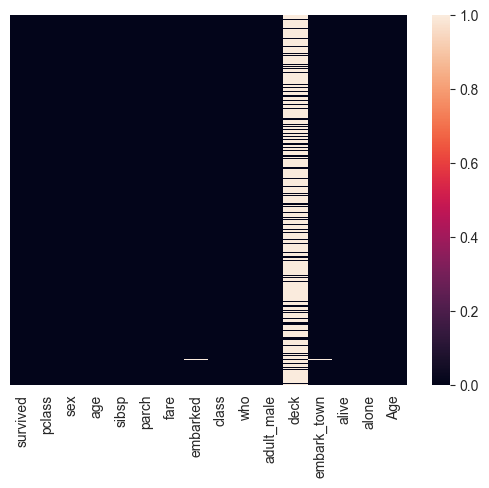

In [40]:
sns.heatmap(df.isnull(),yticklabels=False,)

In [45]:
df.drop('deck',axis=1,inplace=True)

In [46]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,Age
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,22.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,38.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,26.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,35.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,27.0
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,19.0
888,0,3,female,24.0,1,2,23.4500,S,Third,woman,False,Southampton,no,False,24.0
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,26.0
